In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [56]:
def run_all_models(X_train_scaled, X_test_scaled, y_train_encoded, y_test_encoded):
    models = {
        "LogisticRegression": LogisticRegression(),
        "SVC": SVC(),
        "DecisionTreeClassifier": DecisionTreeClassifier(random_state=42),
        "RandomForestClassifier": RandomForestClassifier(random_state=42),
        "KNeighborsClassifier": KNeighborsClassifier(),
        "GradientBoostingClassifier": GradientBoostingClassifier(random_state=42),
        "GaussianNB": GaussianNB(),
    }

    # Create an empty DataFrame to store accuracy
    model_performance = []

    for name, model in models.items():
        model.fit(X_train_scaled, y_train_encoded)
        predictions = model.predict(X_test_scaled)
        accuracy = accuracy_score(y_test_encoded, predictions)
        print(f"{name} Accuracy:", accuracy)
        model_performance.append({"Model": name, "Accuracy": accuracy})

    # For the Sequential model
    sequential_model = Sequential()
    sequential_model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
    sequential_model.add(Dense(32, activation='relu'))
    sequential_model.add(Dense(1, activation='sigmoid'))
    sequential_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    sequential_model.fit(X_train_scaled, y_train_encoded, epochs=100, batch_size=10, verbose=1)
    loss, accuracy = sequential_model.evaluate(X_test_scaled, y_test_encoded)
    print(f"Sequential Model Accuracy: {accuracy}")
    model_performance.append({"Model": "Sequential", "Accuracy": accuracy})

    return pd.DataFrame(model_performance)

In [28]:
def encode_binary_values(df:pd.DataFrame, columns:list)->pd.DataFrame:
  """_summary_

  Args:
      df (pd.DataFrame): _description_
      columns (list): _description_

  Returns:
      pd.DataFrame: _description_
  """
  
  for col in columns:
    df[col] = df[col].apply(lambda x: 1 if x == True else 0)
  
  return df

In [29]:
df = pd.read_csv("online_retail_customer_churn.csv")
df

,Customer_ID,Age,Gender,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Promotion_Response,Target_Churn
0,1,62,Other,45.15,5892.58,5,22,453.80,2,0,3,129,True,Responded,True
1,2,65,Male,79.51,9025.47,13,77,22.90,2,2,3,227,False,Responded,False
2,3,18,Male,29.19,618.83,13,71,50.53,5,2,2,283,False,Responded,True
3,4,21,Other,79.63,9110.30,3,33,411.83,5,3,5,226,True,Ignored,True
4,5,21,Other,77.66,5390.88,15,43,101.19,3,0,5,242,False,Unsubscribed,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,54,Male,143.72,1089.09,2,29,77.75,0,3,2,88,True,Ignored,False
996,997,19,Male,164.19,3700.24,9,90,34.45,6,4,4,352,False,Responded,True
997,998,47,Female,113.31,705.85,17,69,187.37,7,3,1,172,True,Unsubscribed,False
998,999,23,Male,72.98,3891.60,7,31,483.80,1,2,5,55,False,Responded,True


In [52]:
df.drop("Customer_ID", axis=1, inplace=True)

In [30]:
df.duplicated().sum()

0

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Customer_ID                 1000 non-null   int64  
 1   Age                         1000 non-null   int64  
 2   Gender                      1000 non-null   object 
 3   Annual_Income               1000 non-null   float64
 4   Total_Spend                 1000 non-null   float64
 5   Years_as_Customer           1000 non-null   int64  
 6   Num_of_Purchases            1000 non-null   int64  
 7   Average_Transaction_Amount  1000 non-null   float64
 8   Num_of_Returns              1000 non-null   int64  
 9   Num_of_Support_Contacts     1000 non-null   int64  
 10  Satisfaction_Score          1000 non-null   int64  
 11  Last_Purchase_Days_Ago      1000 non-null   int64  
 12  Email_Opt_In                1000 non-null   bool   
 13  Promotion_Response          1000 n

In [32]:
df.describe()

,Customer_ID,Age,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,43.267000,111.962960,5080.79265,9.727000,49.456000,266.876530,4.612000,1.934000,2.974000,182.890000
std,288.819436,15.242311,52.844111,2862.12335,5.536346,28.543595,145.873445,2.896869,1.402716,1.391855,104.391319
min,1.000000,18.000000,20.010000,108.94000,1.000000,1.000000,10.460000,0.000000,0.000000,1.000000,1.000000
25%,250.750000,30.000000,67.800000,2678.67500,5.000000,25.000000,139.682500,2.000000,1.000000,2.000000,93.000000
50%,500.500000,43.000000,114.140000,4986.19500,9.000000,49.000000,270.100000,5.000000,2.000000,3.000000,180.500000
75%,750.250000,56.000000,158.452500,7606.47000,14.000000,74.000000,401.602500,7.000000,3.000000,4.000000,274.000000
max,1000.000000,69.000000,199.730000,9999.64000,19.000000,99.000000,499.570000,9.000000,4.000000,5.000000,364.000000


In [33]:
df.columns

Index(['Customer_ID', 'Age', 'Gender', 'Annual_Income', 'Total_Spend',
       'Years_as_Customer', 'Num_of_Purchases', 'Average_Transaction_Amount',
       'Num_of_Returns', 'Num_of_Support_Contacts', 'Satisfaction_Score',
       'Last_Purchase_Days_Ago', 'Email_Opt_In', 'Promotion_Response',
       'Target_Churn'],
      dtype='object')

In [34]:
df["Gender"].value_counts()

Gender
Female    342
Male      334
Other     324
Name: count, dtype: int64

In [35]:
df["Target_Churn"].value_counts()

Target_Churn
True     526
False    474
Name: count, dtype: int64

In [36]:
df["Promotion_Response"].value_counts()

Promotion_Response
Unsubscribed    361
Responded       338
Ignored         301
Name: count, dtype: int64

In [37]:
df["Email_Opt_In"].value_counts()

Email_Opt_In
True     529
False    471
Name: count, dtype: int64

In [63]:
features_to_encode = ["Gender", "Promotion_Response"]

In [39]:
df = encode_binary_values(df, ["Email_Opt_In", "Target_Churn"])

In [40]:
df["Target_Churn"]

0      1
1      0
2      1
3      1
4      0
      ..
995    0
996    1
997    0
998    1
999    1
Name: Target_Churn, Length: 1000, dtype: int64

In [41]:
df["Email_Opt_In"].value_counts()

Email_Opt_In
1    529
0    471
Name: count, dtype: int64

In [42]:
df

,Customer_ID,Age,Gender,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Promotion_Response,Target_Churn
0,1,62,Other,45.15,5892.58,5,22,453.80,2,0,3,129,1,Responded,1
1,2,65,Male,79.51,9025.47,13,77,22.90,2,2,3,227,0,Responded,0
2,3,18,Male,29.19,618.83,13,71,50.53,5,2,2,283,0,Responded,1
3,4,21,Other,79.63,9110.30,3,33,411.83,5,3,5,226,1,Ignored,1
4,5,21,Other,77.66,5390.88,15,43,101.19,3,0,5,242,0,Unsubscribed,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,54,Male,143.72,1089.09,2,29,77.75,0,3,2,88,1,Ignored,0
996,997,19,Male,164.19,3700.24,9,90,34.45,6,4,4,352,0,Responded,1
997,998,47,Female,113.31,705.85,17,69,187.37,7,3,1,172,1,Unsubscribed,0
998,999,23,Male,72.98,3891.60,7,31,483.80,1,2,5,55,0,Responded,1


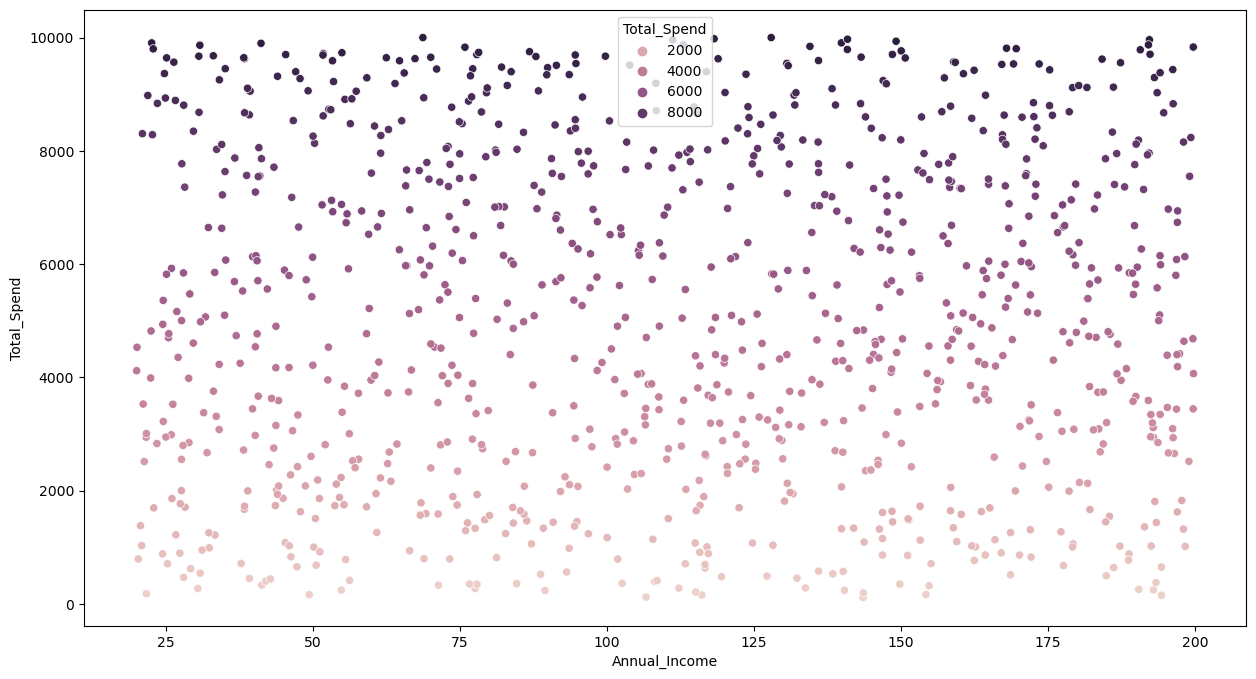

In [44]:
plt.figure(figsize=(15,8))
sns.scatterplot(data = df, x="Annual_Income", y="Total_Spend", hue ="Total_Spend")
plt.show()

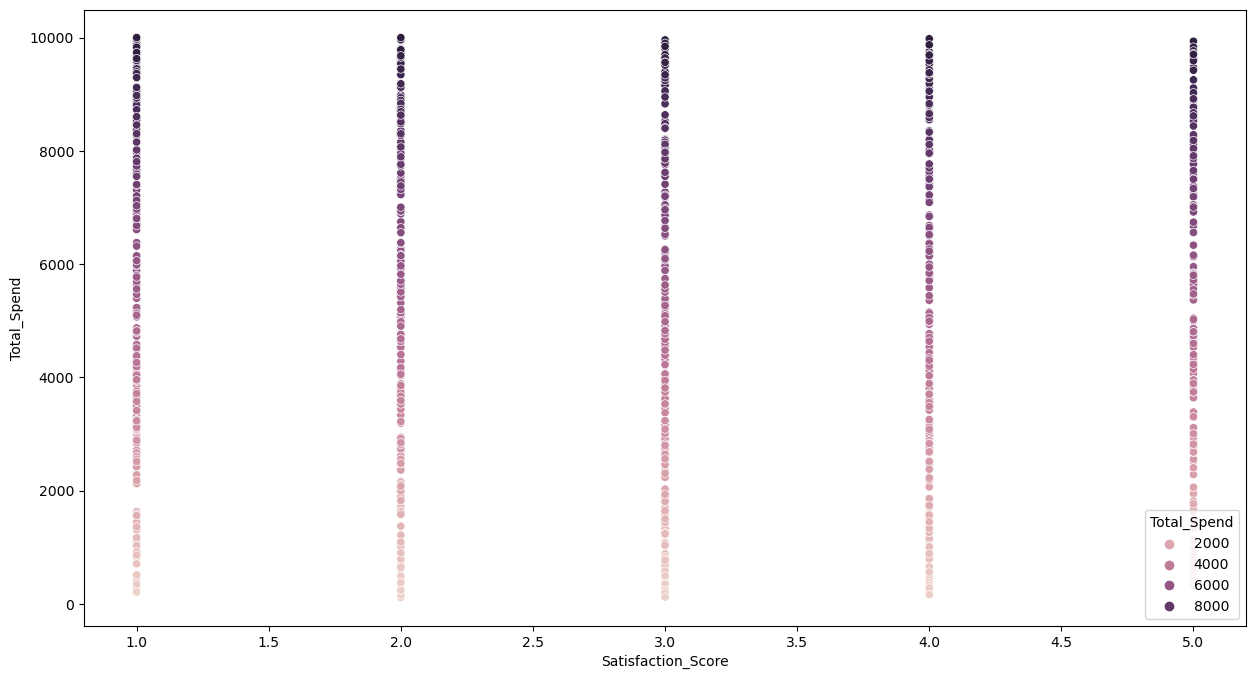

In [54]:
plt.figure(figsize=(15,8))
sns.scatterplot(data = df, x="Satisfaction_Score", y="Total_Spend", hue ="Total_Spend")
plt.show()

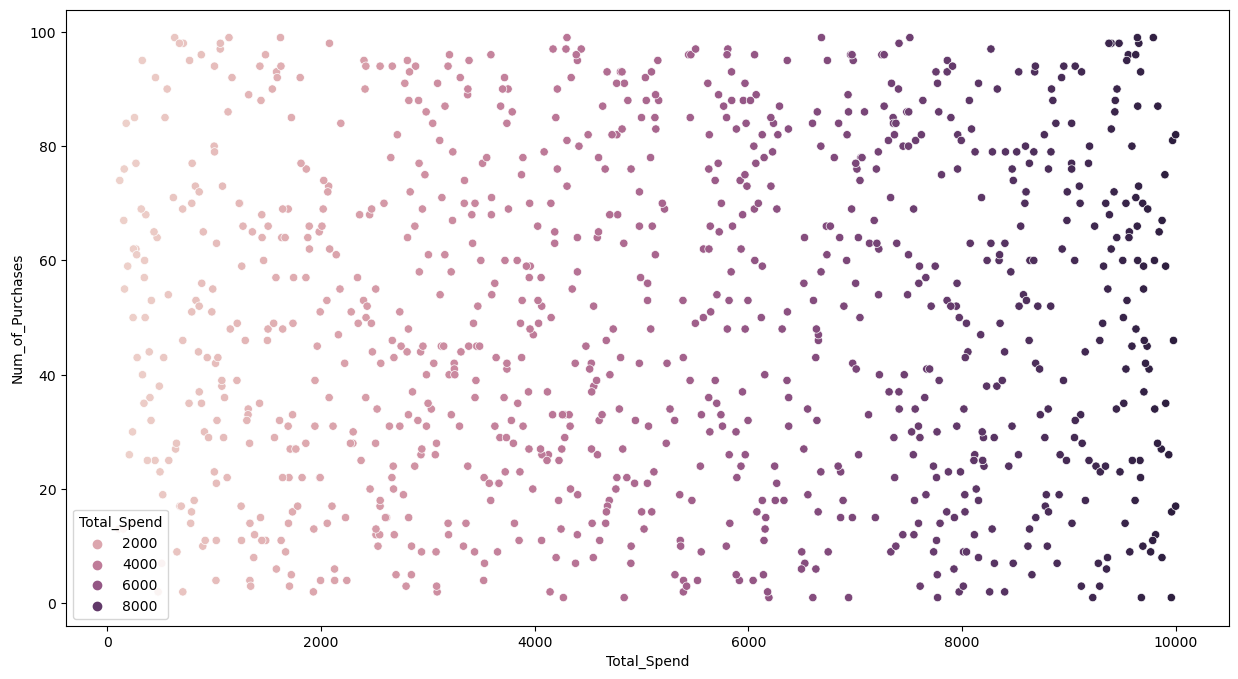

In [46]:
plt.figure(figsize=(15,8))
sns.scatterplot(data = df, x="Total_Spend", y="Num_of_Purchases", hue ="Total_Spend")
plt.show()

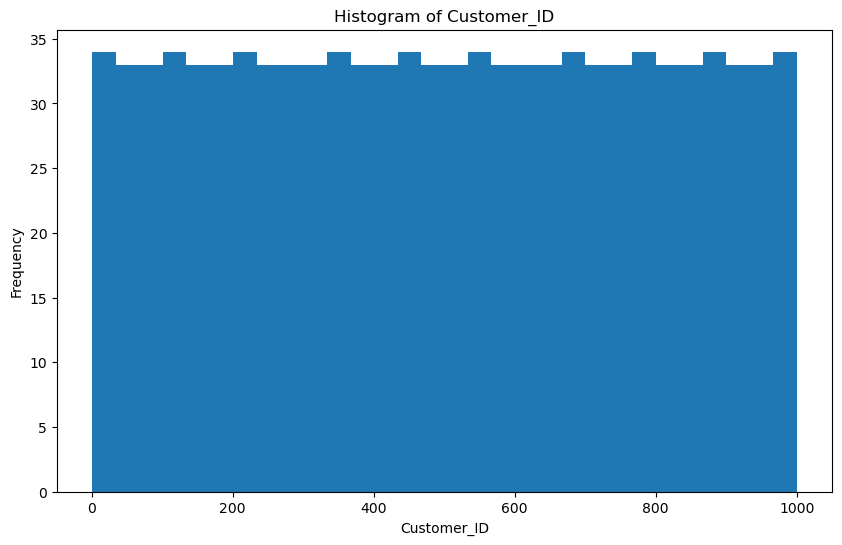

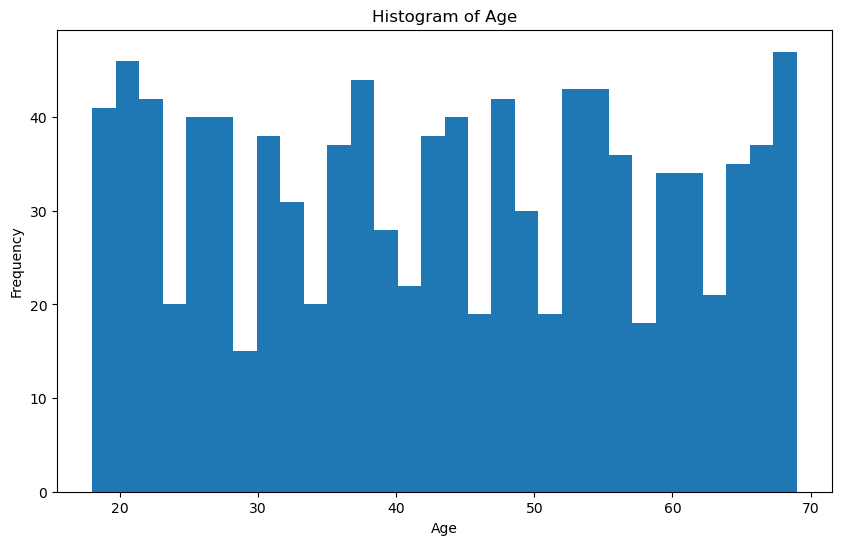

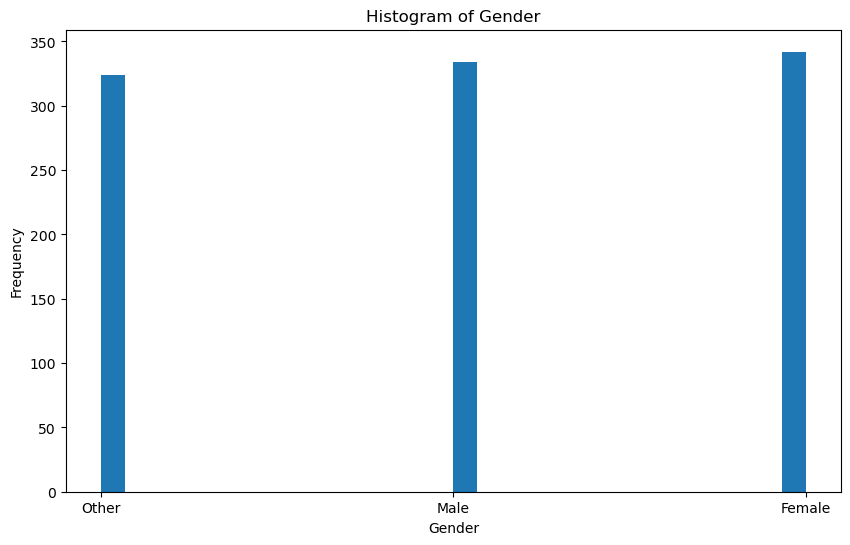

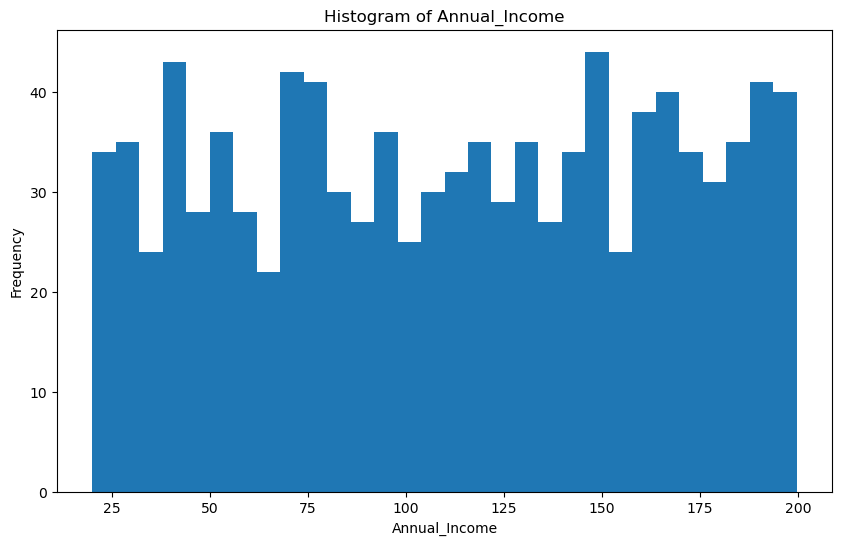

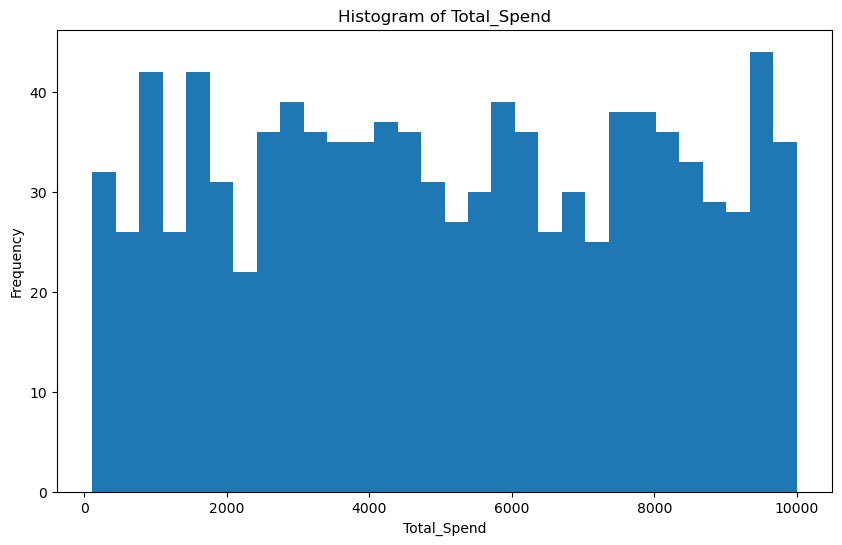

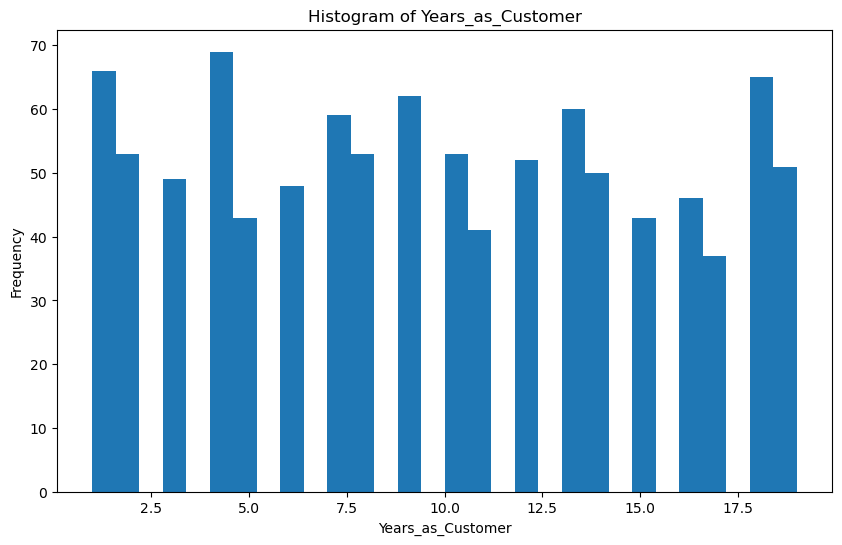

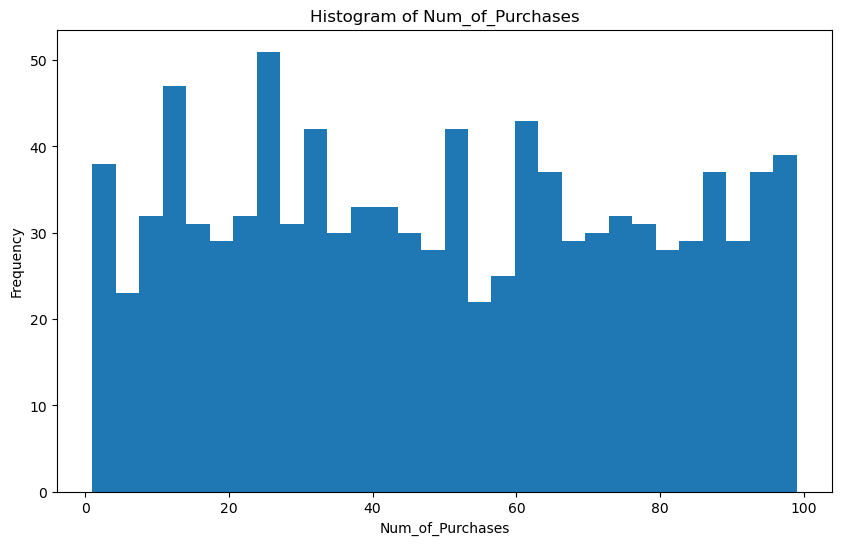

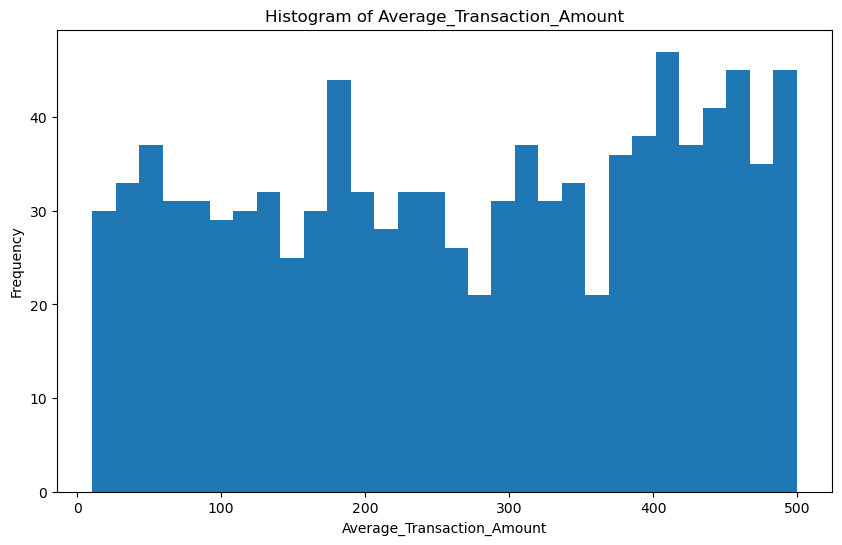

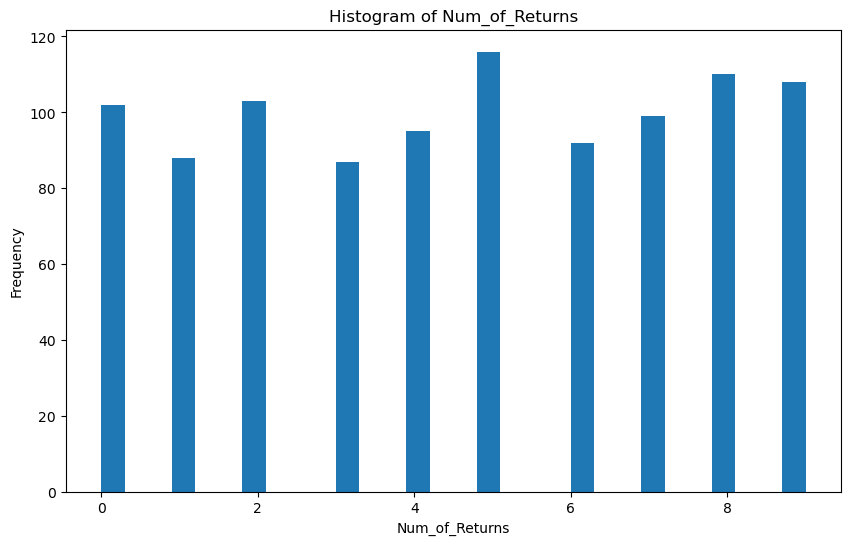

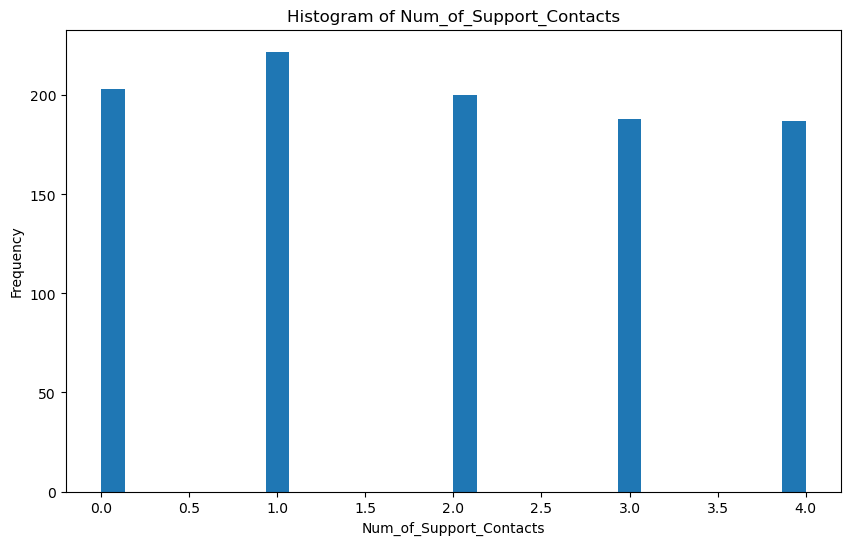

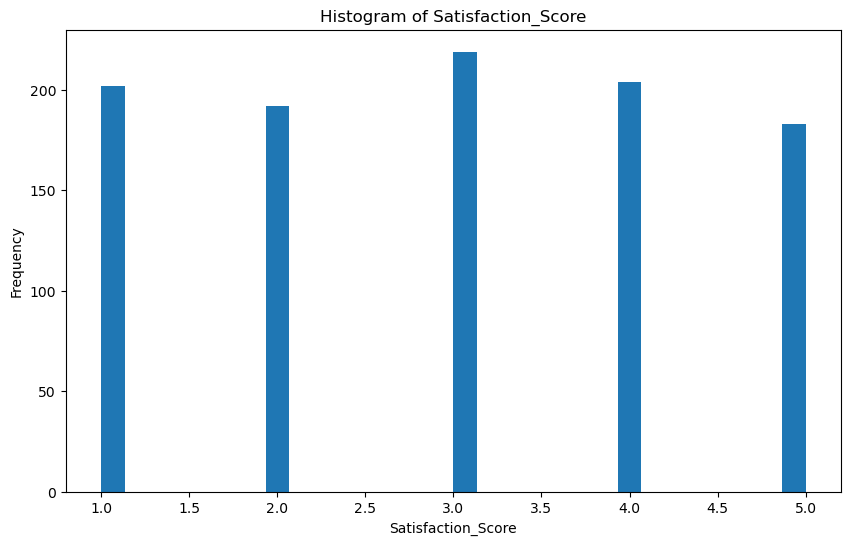

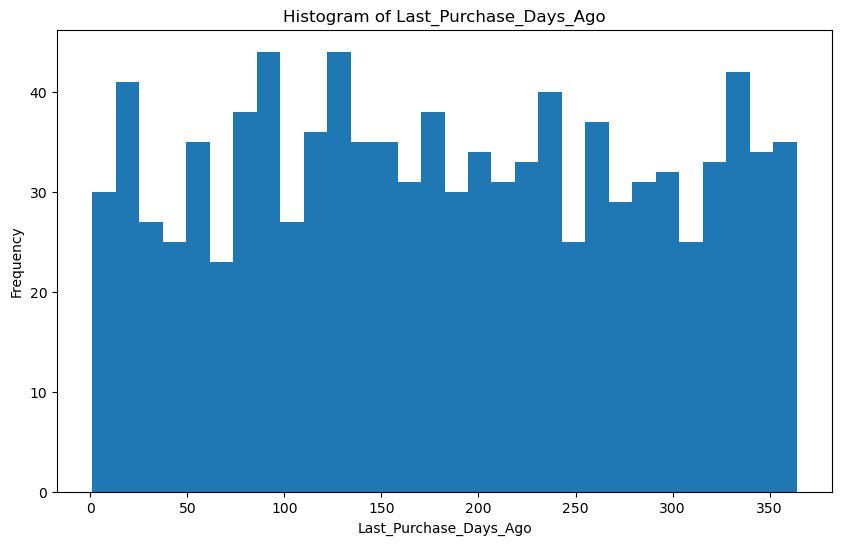

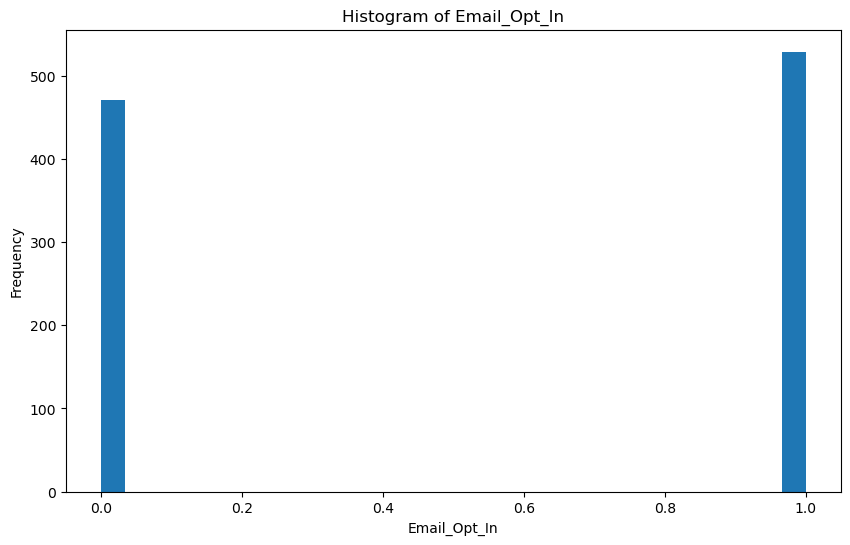

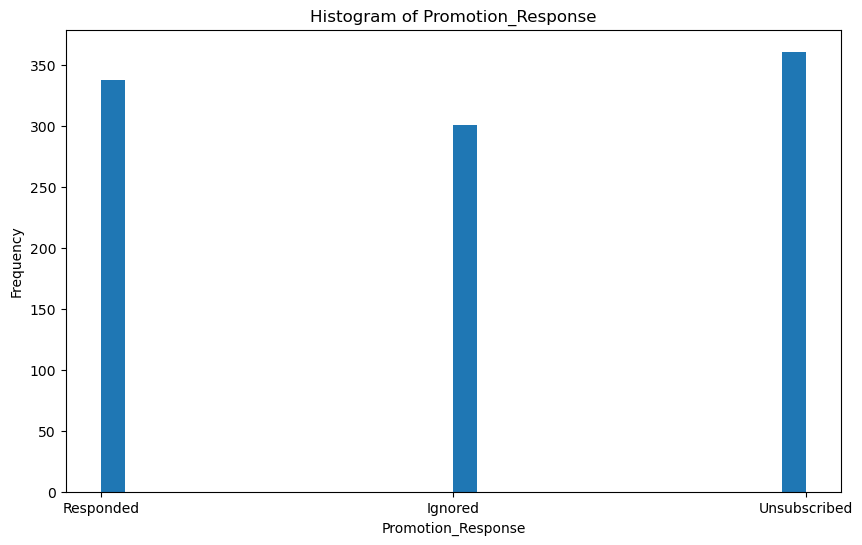

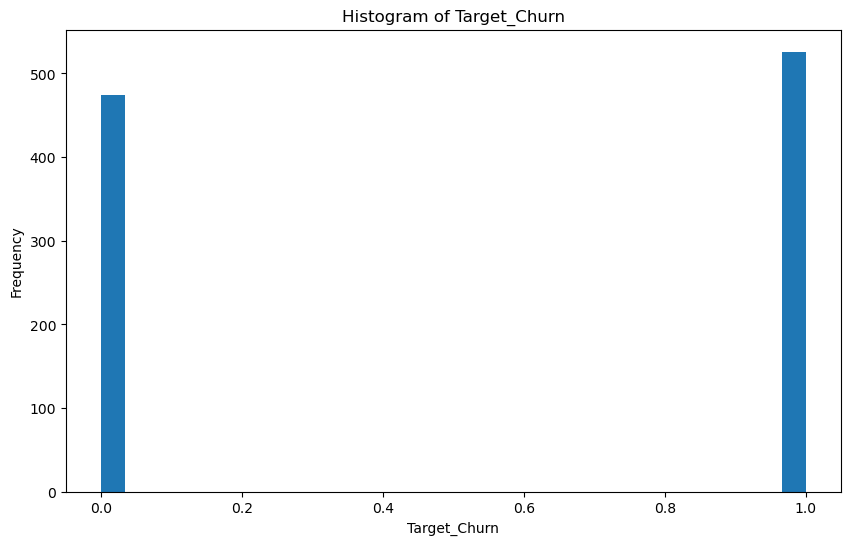

In [47]:
for column in df.columns:
    plt.figure(figsize=(10, 6))
    df[column].hist(bins=30)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(False)
    plt.show()

/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/seaborn/_oldcore.py

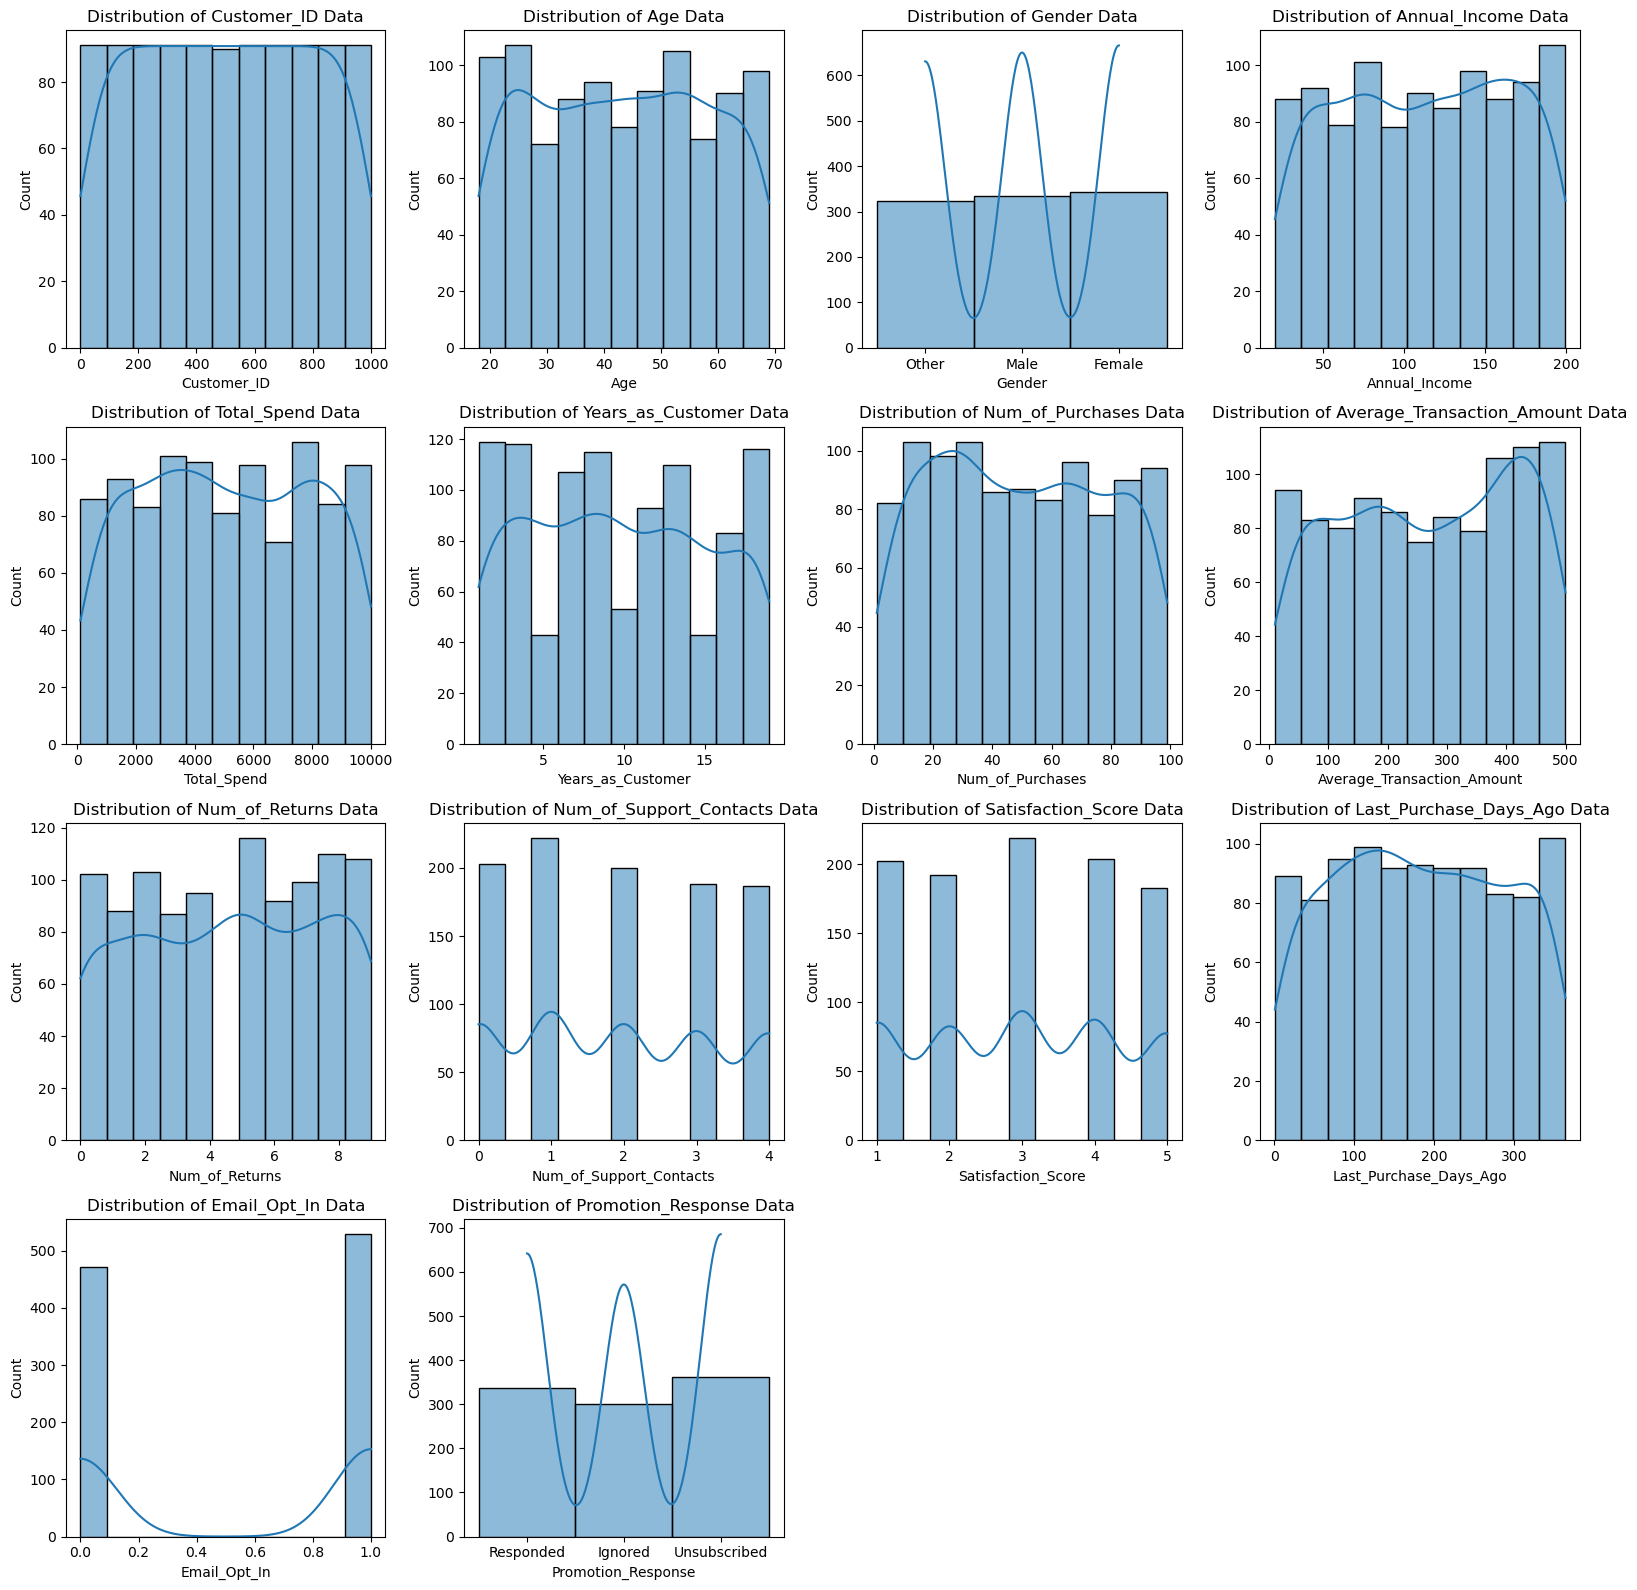

In [48]:
plt.figure(figsize = (16, 16))
num_plots = len(df.columns) - 1  # Exclude the last column
rows = (num_plots + 3) // 4  # Calculate the number of rows needed, add 3 to round up

for i, col in enumerate(df.columns[:-1]):
    plt.subplot(rows, 4, i+1)
    sns.histplot(df[col], kde= True)
    plt.title(f"Distribution of {col} Data")
    plt.tight_layout()
    plt.plot()

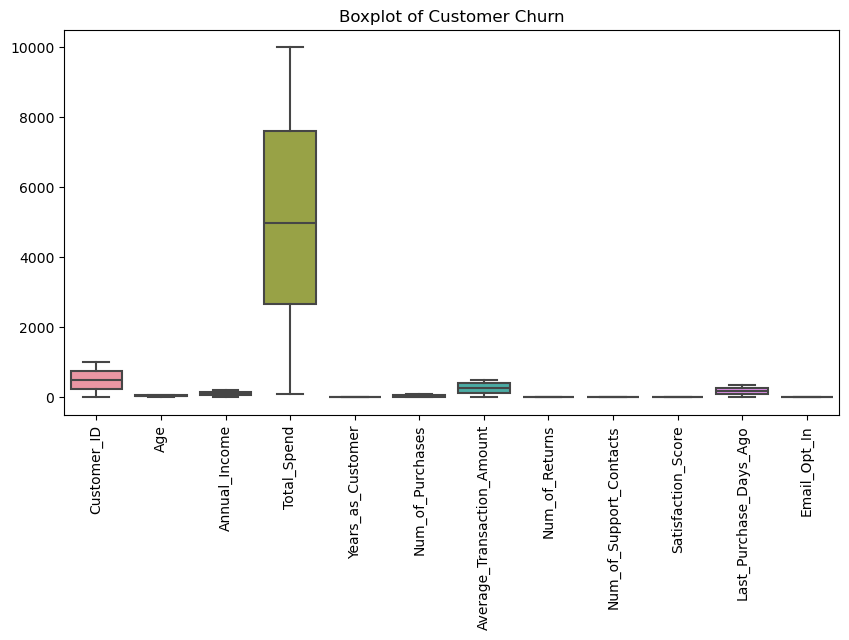

In [49]:
plt.figure(figsize = (10, 5))
sns.boxplot(df[df.columns[:-1]])
plt.title("Boxplot of Customer Churn")
plt.xticks(rotation = 90)
plt.show()

In [65]:
# Instantiate the encoder
encoder = OneHotEncoder(sparse=False)

# Fit and transform the data
encoded_data = encoder.fit_transform(df[features_to_encode])

# Create a DataFrame with the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(features_to_encode))

# Reset index of your original DataFrame if it's not in default sequential order
df.reset_index(drop=True, inplace=True)

# Concatenate the original DataFrame with the new encoded DataFrame
df = pd.concat([df, encoded_df], axis=1)

# Optionally, drop the original columns
df.drop(features_to_encode, axis=1, inplace=True)

/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [68]:
X, y = df.drop("Target_Churn", axis=1), df["Target_Churn"]

X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train_scaled, X_test_scaled = scaler.fit_transform(X_train), scaler.transform(X_test)

In [69]:
models = run_all_models(X_train_scaled, X_test_scaled, y_train_encoded, y_test_encoded)
models

LogisticRegression Accuracy: 0.465
SVC Accuracy: 0.505
DecisionTreeClassifier Accuracy: 0.545
RandomForestClassifier Accuracy: 0.545
KNeighborsClassifier Accuracy: 0.475
GradientBoostingClassifier Accuracy: 0.565
GaussianNB Accuracy: 0.46
Epoch 1/100
80/80 [==============================] - 0s 525us/step - loss: 0.7032 - accuracy: 0.5013
Epoch 2/100
80/80 [==============================] - 0s 461us/step - loss: 0.6815 - accuracy: 0.5625
Epoch 3/100
80/80 [==============================] - 0s 490us/step - loss: 0.6688 - accuracy: 0.5925
Epoch 4/100
80/80 [==============================] - 0s 469us/step - loss: 0.6574 - accuracy: 0.6187
Epoch 5/100
80/80 [==============================] - 0s 489us/step - loss: 0.6449 - accuracy: 0.6363
Epoch 6/100
80/80 [==============================] - 0s 502us/step - loss: 0.6331 - accuracy: 0.6612
Epoch 7/100
80/80 [==============================] - 0s 572us/step - loss: 0.6209 - accuracy: 0.6825
Epoch 8/100
80/80 [==============================] - 0

,Model,Accuracy
0,LogisticRegression,0.465
1,SVC,0.505
2,DecisionTreeClassifier,0.545
3,RandomForestClassifier,0.545
4,KNeighborsClassifier,0.475
5,GradientBoostingClassifier,0.565
6,GaussianNB,0.460
7,Sequential,0.490


In [70]:
X, y = df.drop("Target_Churn", axis=1), df["Target_Churn"]

X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()

X_train_scaled, X_test_scaled = scaler.fit_transform(X_train), scaler.transform(X_test)

In [71]:
models = run_all_models(X_train_scaled, X_test_scaled, y_train_encoded, y_test_encoded)
models

LogisticRegression Accuracy: 0.465
SVC Accuracy: 0.48
DecisionTreeClassifier Accuracy: 0.545
RandomForestClassifier Accuracy: 0.55
KNeighborsClassifier Accuracy: 0.53
GradientBoostingClassifier Accuracy: 0.57
GaussianNB Accuracy: 0.46
Epoch 1/100
80/80 [==============================] - 0s 533us/step - loss: 0.6958 - accuracy: 0.5050
Epoch 2/100
80/80 [==============================] - 0s 473us/step - loss: 0.6899 - accuracy: 0.5263
Epoch 3/100
80/80 [==============================] - 0s 478us/step - loss: 0.6854 - accuracy: 0.5312
Epoch 4/100
80/80 [==============================] - 0s 481us/step - loss: 0.6826 - accuracy: 0.5675
Epoch 5/100
80/80 [==============================] - 0s 578us/step - loss: 0.6811 - accuracy: 0.5512
Epoch 6/100
80/80 [==============================] - 0s 1ms/step - loss: 0.6767 - accuracy: 0.5725
Epoch 7/100
80/80 [==============================] - 0s 738us/step - loss: 0.6739 - accuracy: 0.5750
Epoch 8/100
80/80 [==============================] - 0s 466u

,Model,Accuracy
0,LogisticRegression,0.465
1,SVC,0.480
2,DecisionTreeClassifier,0.545
3,RandomForestClassifier,0.550
4,KNeighborsClassifier,0.530
5,GradientBoostingClassifier,0.570
6,GaussianNB,0.460
7,Sequential,0.510
